# manual QC to inspect samples

In [2]:
#####################
## Define settings ##
#####################
here::i_am("processing/1_create_seurat_rna.R")
source(here::here("settings.R"))

here() starts at /rds/project/rds-SDzz0CATGms/users/bt392/03_Stat3_RNA/code



In [45]:
io$outdir = file.path(io$basedir, '/results/rna/qc/')

In [3]:
io$rna.sce

[1] "/rds/project/rds-SDzz0CATGms/users/bt392/03_Stat3_RNA/processed/SingleCellExperiment.rds"

In [4]:
io$metadata

[1] "/rds/project/rds-SDzz0CATGms/users/bt392/03_Stat3_RNA/processed/metadata.txt.gz"

In [7]:
sce = readRDS(io$rna.sce)
meta = fread(file.path(io$basedir, 'results/rna/qc/sample_metadata_after_qc.txt.gz'))

In [83]:
head(meta)

sample,cell,barcode,nFeature_RNA,nCount_RNA,mitochondrial_percent_RNA,ribosomal_percent_RNA,stage,tdTom,pass_rnaQC
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACCCAAGATGTTCC-1,AAACCCAAGATGTTCC-1,4837,53199,1.47,22.87,E8.5,TRUE,TRUE
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACCCAAGCACTTTG-1,AAACCCAAGCACTTTG-1,310,648,32.25,12.81,E8.5,TRUE,FALSE
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACCCATCAGACCTA-1,AAACCCATCAGACCTA-1,4973,24165,0.95,19.26,E8.5,TRUE,TRUE
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACGAAAGCGCCTTG-1,AAACGAAAGCGCCTTG-1,1614,4156,6.74,28.20,E8.5,TRUE,FALSE
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACGAACAATGTTGC-1,AAACGAACAATGTTGC-1,5585,34341,0.22,26.76,E8.5,TRUE,TRUE
SLX-21143_SITTA2_HTJH3DSX2,SLX-21143_SITTA2_HTJH3DSX2#AAACGAACACACCAGC-1,AAACGAACACACCAGC-1,5016,41496,1.66,25.01,E8.5,TRUE,TRUE


In [84]:
x_col = rep(c('red', 'black'), 8)
p1 = ggplot(meta, aes(sample, fill=pass_rnaQC)) + 
    geom_bar(size=0.5, col='black') + 
    scale_fill_manual(values=c('TRUE'='darkgreen', 'FALSE'='darkred'), name='Pass QC') + 
    theme_bw() + 
    ylab('number of cells') + 
    ggtitle('Number of cells passing QC per sample') + 
    facet_grid(~stage, scale='free', space = "free_x") + 
    theme(axis.text.x=element_text(angle=-45, hjust=0, colour=x_col),
          axis.title.x=element_blank(),
         strip.background=element_blank(),
         strip.text=element_text(size=15),
         title=element_text(size=20))

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [85]:
pdf(file.path(io$outdir, 'qc_per_sample.pdf'), width=7, height=5)
    p1
dev.off()

png 
  2

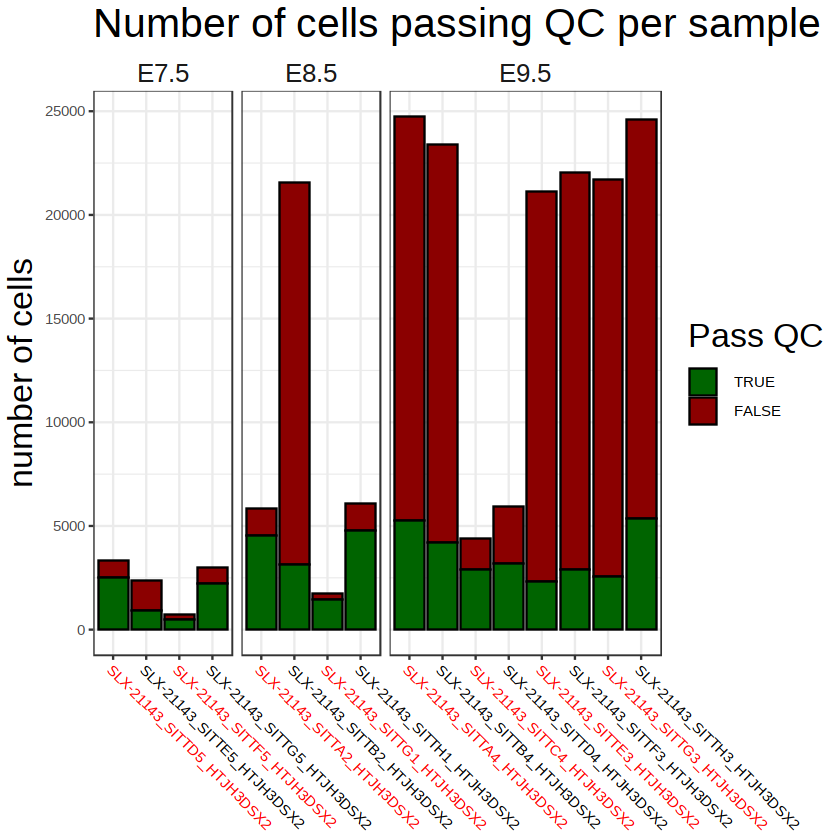

In [86]:
p1

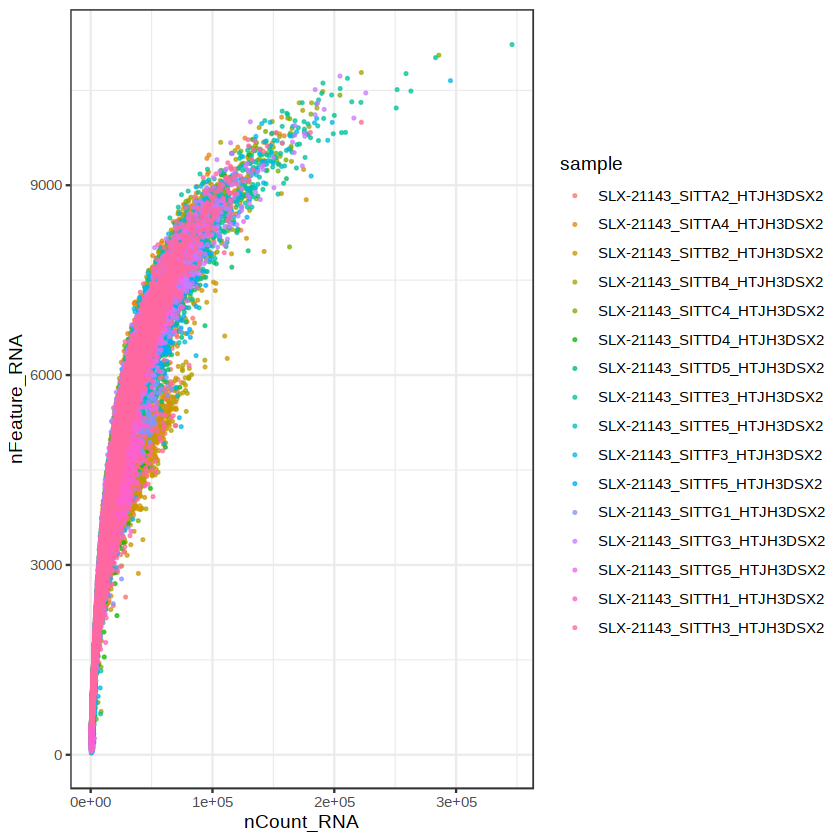

In [59]:
ggplot(meta, aes(nCount_RNA, nFeature_RNA, col=sample)) + geom_point(size=0.4, alpha=0.7) + theme_bw()

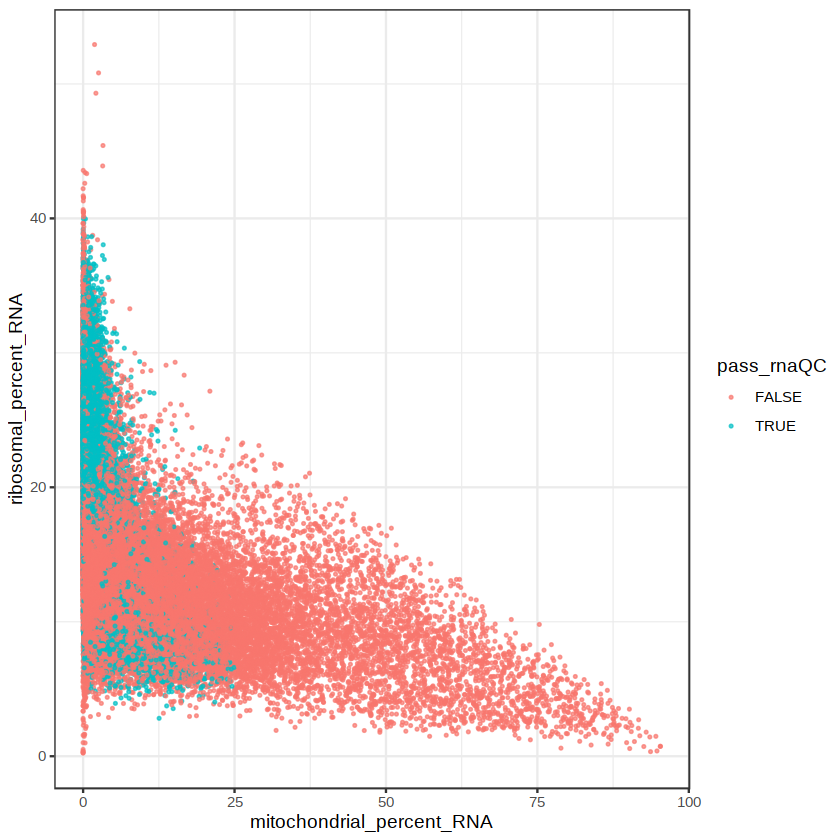

In [61]:
ggplot(meta, aes(mitochondrial_percent_RNA, ribosomal_percent_RNA, col=pass_rnaQC)) + geom_point(size=0.4, alpha=0.7) + theme_bw()

In [66]:
nrow(meta)

[1] 192657

In [62]:
sce

class: SingleCellExperiment 
dim: 29453 48828 
metadata(0):
assays(1): counts
rownames(29453): Xkr4 Gm1992 ... CAAA01147332.1 tomato-td
rowData names(0):
colnames(48828): SLX-21143_SITTA2_HTJH3DSX2#AAACCCAAGATGTTCC-1
  SLX-21143_SITTA2_HTJH3DSX2#AAACCCATCAGACCTA-1 ...
  SLX-21143_SITTH3_HTJH3DSX2#TTTGTTGGTAAGATCA-1
  SLX-21143_SITTH3_HTJH3DSX2#TTTGTTGGTCATCGGC-1
colData names(10): sample barcode ... pass_rnaQC sizeFactor
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [87]:
meta_pass = meta[pass_rnaQC==TRUE] %>% .[match(colnames(sce), cell)]

In [111]:
x_col = rep(c('red', 'black'), 8)
p2 = ggplot(meta_pass, aes(sample, log1p(as.vector(counts(sce['tomato-td']))))) + 
    
    geom_point(position = position_jitterdodge(jitter.width =0.8), size=0.1, aes(col=tdTom)) + 
    geom_boxplot(outlier.shape=NA, fill=NA) +
    scale_color_manual(values=c('TRUE'='red', 'FALSE'='black')) + 
    theme_bw() + 
    ylab('log1p(tdTom) expression') + 
    ggtitle('tdTomato expression per sample') + 
    facet_grid(~stage, scale='free', space = "free_x") + 
    theme(axis.text.x=element_text(angle=-45, hjust=0, colour=x_col),
          axis.title.x=element_blank(),
         strip.background=element_blank(),
         strip.text=element_text(size=15),
         title=element_text(size=20),
         legend.position='none')

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


In [112]:
pdf(file.path(io$outdir, 'qc_tdTom_expression.pdf'), width=7, height=5)
    p2
dev.off()

png 
  2

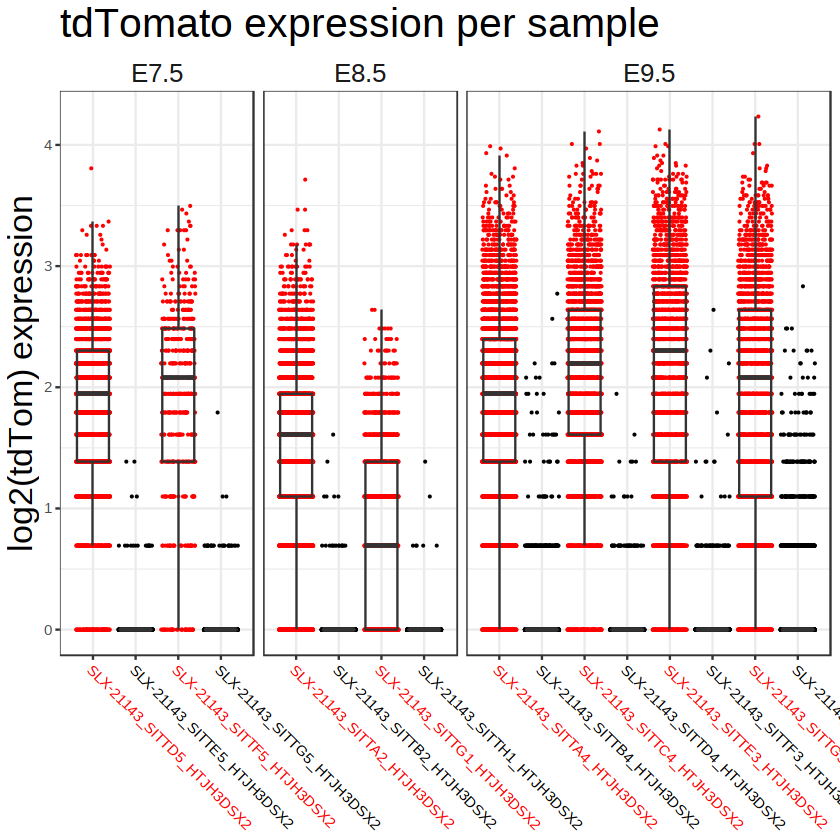

In [113]:
p2

In [119]:
#####################
## Define arguments ##
#####################

#p <- ArgumentParser(description='')
#p$add_argument('--metadata',       type="character",                    help='Metadata')
#p$add_argument('--sce',         type="character",                            help='SingleCellExperiment file')
#args <- p$parse_args(commandArgs(TRUE))
args = list()
args$sce = io$rna.sce 
args$metadata = file.path(io$basedir, 'results/rna/mapping/sample_metadata_after_mapping.txt.gz')
metadata = fread(args$metadata)

###############
## Load data ##
###############

metadata <- fread(args$metadata)
sce = readRDS(args$sce)

In [137]:
tdtom_corr = data.table(cell = colnames(sce), tdTom_corr = ifelse(as.vector(counts(sce['tomato-td']))>0, TRUE, FALSE))

In [186]:
metadata <- fread(args$metadata)
metadata = metadata[,idx:=.I] %>%
    merge(tdtom_corr, by='cell', all=TRUE) %>%
    .[,tdTom_corr:=ifelse(tdTom==TRUE & !is.na(tdTom_corr), TRUE, tdTom_corr)] %>% 
    .[order(idx)] 

In [ ]:
fwrite(metadata, args$metadata)

In [187]:
meta_pass = metadata[pass_rnaQC==TRUE] %>% .[match(colnames(sce), cell)]

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


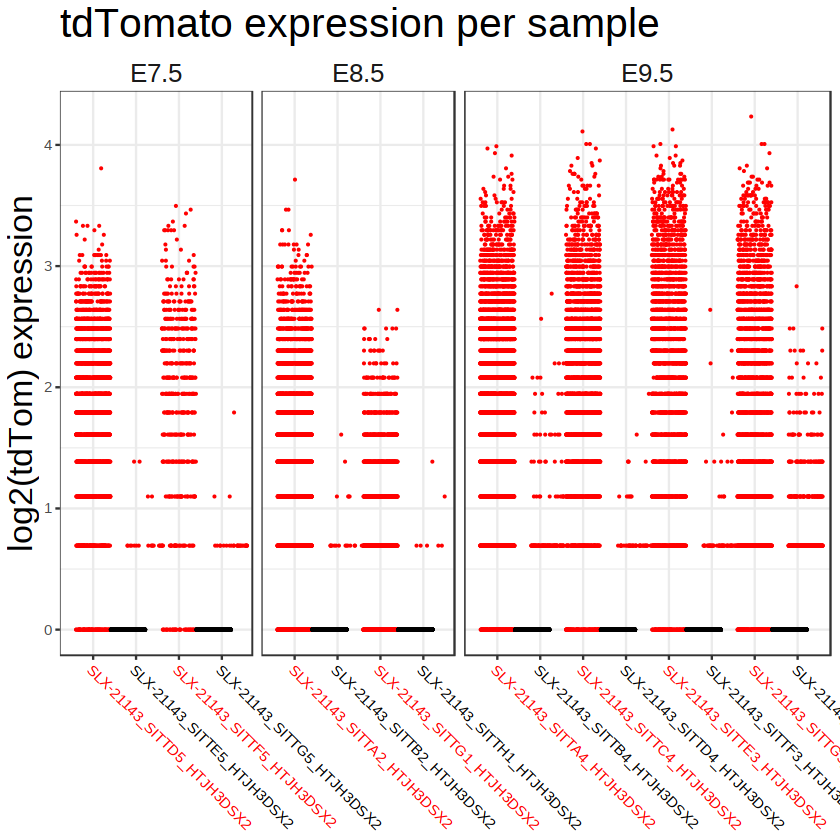

In [188]:
x_col = rep(c('red', 'black'), 8)
p3 = ggplot(meta_pass, aes(sample, log1p(as.vector(counts(sce['tomato-td']))))) + 
    
    geom_point(position = position_jitterdodge(jitter.width =0.8), size=0.1, aes(col=tdTom_corr)) + 
 #   geom_boxplot(outlier.shape=NA, fill=NA) +
    scale_color_manual(values=c('TRUE'='red', 'FALSE'='black')) + 
    theme_bw() + 
    ylab('log2(tdTom) expression') + 
    ggtitle('tdTomato expression per sample') + 
    facet_grid(~stage, scale='free', space = "free_x") + 
    theme(axis.text.x=element_text(angle=-45, hjust=0, colour=x_col),
          axis.title.x=element_blank(),
         strip.background=element_blank(),
         strip.text=element_text(size=15),
         title=element_text(size=20),
         legend.position='none')
p3

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


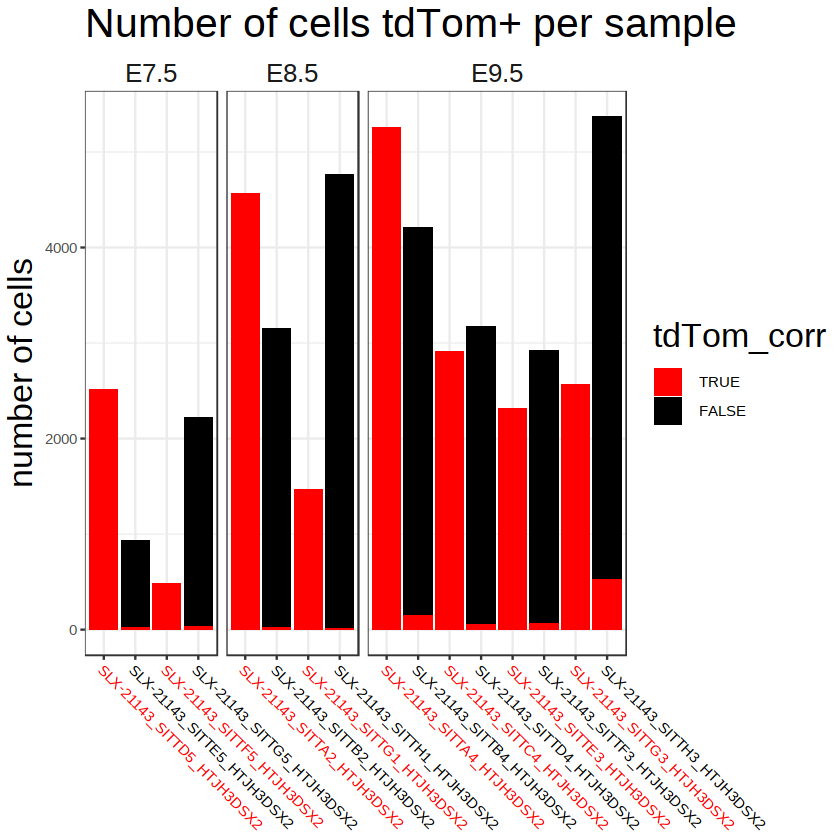

In [190]:
x_col = rep(c('red', 'black'), 8)
p4 = ggplot(meta_pass, aes(sample, fill=tdTom_corr)) + 
    geom_bar(size=0.5) + 
    scale_fill_manual(values=c('TRUE'='red', 'FALSE'='black'), name='tdTom_corr') + 
    theme_bw() + 
    ylab('number of cells') + 
    ggtitle('Number of cells tdTom+ per sample') + 
    facet_grid(~stage, scale='free', space = "free_x") + 
    theme(axis.text.x=element_text(angle=-45, hjust=0, colour=x_col),
          axis.title.x=element_blank(),
         strip.background=element_blank(),
         strip.text=element_text(size=15),
         title=element_text(size=20))
p4